# Data exploration Object detection

In [1]:
import os
import numpy as np
import pandas as pd

import cv2

from matplotlib import pyplot as plt
from matplotlib import patches
%matplotlib inline

from io_util import label_file_to_list, xy_to_img_coordinates

In [2]:
root_dir = "/Stor1/wout/TreeAI4Species/ObjDet/"
dir_example = os.path.join(root_dir, "12_RGB_ObjDet_640_fL")

In [27]:
def plot_image_with_boxes(image_file, label_file):
    # read image and bboxs
    bboxs = label_file_to_list(label_file)
    img = cv2.imread(image_file)

    # convert bboxs to image coordinates
    bboxs = xy_to_img_coordinates(bboxs, img)

    # plot
    fig, ax = plt.subplots()
    ax.imshow(img)
    for _, row in bboxs.iterrows():
        x = row["x_center"] - row["width"]/2
        y = row["y_center"] - row["height"]/2
        w = row["width"]
        h = row["height"]
        # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        rect = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x,y, int(row["label"]), fontsize=8, color="white", bbox=dict(facecolor='red', edgecolor="none"))
        
    plt.show()
    return 

    label  x_center  y_center     width    height
0       2  0.060937  0.998437  0.003125  0.003125
1       8  0.190625  0.949219  0.112500  0.101562
2       8  0.264844  0.939063  0.079687  0.121875
3       3  0.250781  0.788281  0.101562  0.120313
4       3  0.183594  0.843750  0.126562  0.134375
..    ...       ...       ...       ...       ...
68      2  0.694531  0.572656  0.201563  0.301563
69      2  0.839844  0.691406  0.210938  0.164062
70     17  0.889844  0.516406  0.220312  0.367188
71      2  0.275781  0.035156  0.120313  0.070312
72      3  0.316406  0.255469  0.098437  0.089063

[73 rows x 5 columns]


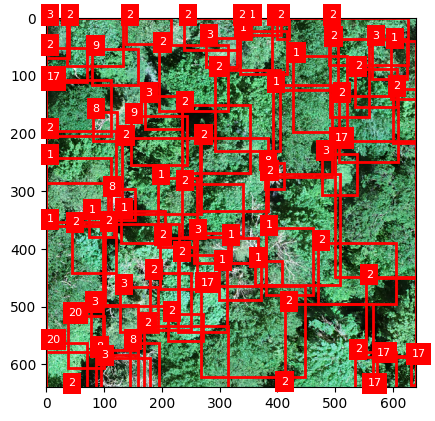

In [28]:
# example_id = "000000001707"
# example_id = "000000001711"
example_id = "000000001261"
label_file = os.path.join(dir_example, "train", "labels", f"{example_id}.txt")
img_file = os.path.join(dir_example, "train", "images", f"{example_id}.png")


print(label_file_to_list(label_file))
plot_image_with_boxes(img_file, label_file)